# Tooploox Data Science exercise

## STEP 1

In [1]:
import pandas as pd

dataset = pd.read_csv('./data.csv', header=None)

dataset.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,...
mean,39889.541485,69421.946507,92531.329694,112778.213974,131477.222707,148739.728166,164791.632096,180186.234716,195111.381004,209449.641921,223060.731441,236203.442140,249019.028384,261379.820961,273280.531659,284814.076419,296262.682314,307692.235808,319178.485808,330661.925764,...
std,24816.900947,58148.785461,98927.747690,144261.546019,192452.433583,239041.331493,283296.193637,325962.515280,366300.891704,405638.935787,446023.593710,488655.944103,534911.870951,577170.060176,614871.897959,649642.649033,683258.317793,715984.542014,748402.519637,780399.421185,...
min,0.000000,3886.000000,8608.000000,9396.000000,9989.000000,10546.000000,11225.000000,12181.000000,13379.000000,14585.000000,15757.000000,16648.000000,17401.000000,18140.000000,18884.000000,19298.000000,19403.000000,19403.000000,19950.000000,20141.000000,...
25%,23913.250000,38524.250000,47825.500000,55491.000000,61926.750000,68438.250000,74120.000000,79430.250000,84205.000000,88832.500000,92617.000000,96329.000000,100206.500000,103183.750000,105447.750000,107927.000000,110656.500000,112572.500000,115571.500000,117754.000000,...
50%,34947.500000,56115.000000,70263.000000,81200.500000,91107.500000,99671.000000,108780.500000,116114.500000,124802.000000,131867.000000,138456.500000,144117.000000,150766.000000,156189.500000,161866.500000,166839.000000,171180.000000,174576.500000,177067.500000,181132.000000,...
75%,50530.500000,84617.750000,108896.750000,130094.750000,147509.750000,162161.000000,174918.750000,187387.250000,199571.500000,210895.500000,223501.750000,233610.500000,240687.000000,251383.500000,261807.750000,271356.500000,280070.000000,287143.000000,295008.000000,304462.250000,...
max,189528.000000,973903.000000,1737730.000000,2518686.000000,3306221.000000,4023023.000000,4819420.000000,5799610.000000,6752819.000000,7699066.000000,8734416.000000,9825597.000000,11022241.000000,11926335.000000,12542285.000000,12963056.000000,13281662.000000,13505291.000000,13674123.000000,13887291.000000,...


### Analysing basic statistics for v(24), v(72), v(168)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

for i in [24,72,168]:
    print "For %d-th hour: mean = %f, std = %f, median = %d" % (i, dataset[i].mean(), dataset[i].std(), dataset[i].median())

For 24-th hour: mean = 376765.517467, std = 923646.739985, median = 194357
For 72-th hour: mean = 613303.341703, std = 1653969.423316, median = 237417
For 168-th hour: mean = 743209.837336, std = 2007963.831213, median = 252287


## STEP 2

### Plotting the distribution of v(168)

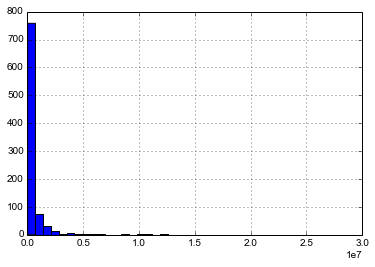

In [3]:
dataset[168].hist(bins = 40)

## STEP 3

### Plotting the log-transformed distribution of v(168)

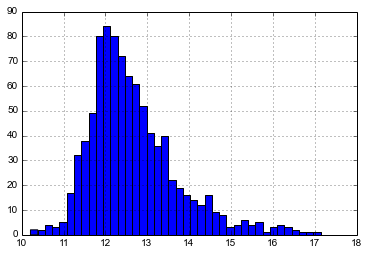

In [4]:
log_168 = dataset[168].apply(lambda x: np.log(x))
log_168.hist(bins = 40)

We can see that after applying a log transformation the histogram distribiutions are bell shaped what suggests that this data is a log-normal distributed.

## STEP 4

### Deleting outliers

In [5]:
std_168 = log_168.std()
mean_168 = log_168.mean()

selector = np.abs(log_168 - mean_168) < 3 * std_168

print dataset.shape
dataset = dataset.loc[selector]
print dataset.shape

(916, 169)
(901, 169)


## STEP 5

### Computing correlation coefficients between v(n) for n = 1, 2, ..., 24 and v(168).

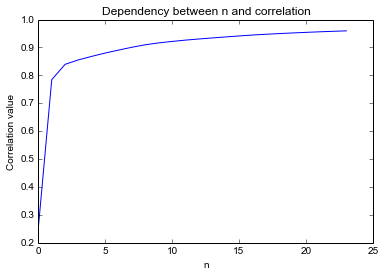

In [6]:
range_1_24 = range(1,25,1)

correlations = dataset[range_1_24].apply(lambda x: np.log(x+1)).apply(lambda x: log_168.corr(x))

plt.plot(correlations, label='Correlation')
plt.xlabel('n')
plt.ylabel('Correlation value')
plt.title('Dependency between n and correlation')


## STEP 6

### Train - test split on log-transformed data

In [7]:
range_for_log_transform = range(1, dataset.shape[1])
dataset[range_for_log_transform] = dataset[range_for_log_transform].apply(lambda x: np.log(x+1))

train_test_permutation = np.random.permutation(dataset.shape[0])
split_index = int(0.1 * dataset.shape[0])

test_indices = train_test_permutation[:split_index]
train_indices = train_test_permutation[split_index:]

test, train = dataset.iloc[test_indices], dataset.iloc[train_indices]

## STEP 7

### Training linear models based on only one row

In [8]:
from sklearn.linear_model import LinearRegression

list_of_models = [LinearRegression() for x in xrange(24)]

for i in xrange(24):
    list_of_models[i].fit(train[i+1].reshape(-1,1), train[168])

### Error computation

In [9]:
def m_rse(y_pred, y_true):
    return np.mean((y_pred / y_true -1) ** 2)

linear_input_error = [0] * 24

for i in xrange(24):
    linear_input_error[i] = m_rse(list_of_models[i].predict(test[i + 1].reshape(-1, 1)), test[168])

## STEP 8

### Training linear models based on preceding rows

In [10]:
list_of_models_multiple_inputs = [LinearRegression() for x in xrange(24)]

for i in xrange(24):
    current_range = range(1, i+2)
    list_of_models_multiple_inputs[i].fit(train[current_range].as_matrix().reshape(-1,i+1), train[168])

## STEP 9

### Error computation

In [11]:
multiple_input_error = [0] * 24

for i in xrange(24):
    current_range = range(1, i+2)
    multiple_input_error[i] = m_rse(list_of_models_multiple_inputs[i].predict
                                    (test[current_range].as_matrix().reshape(-1, i + 1)),
                                    test[168])

## STEP 10

 ### Plotting the mRSE values for n ∈ (1, 24) computed on the test dataset.

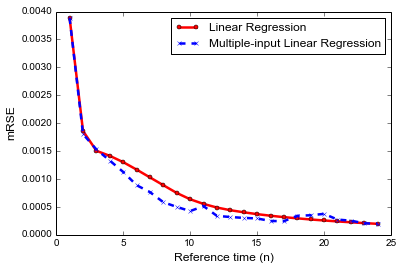

In [12]:
plt.plot(range(1, 25), linear_input_error, label='Linear Regression', linestyle='solid', color='red', marker='o', markersize=4.0, linewidth=2.5)
plt.plot(range(1, 25), multiple_input_error, label='Multiple-input Linear Regression', linestyle='dashed', marker='x', markersize=4.0, color='blue', linewidth=2.5)
plt.legend()
plt.xlabel('Reference time (n)', fontsize=12)
plt.ylabel('mRSE', fontsize=12)

fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = (18,12)

